In [221]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [222]:
df = pd.read_excel('./EastWestAirlines.xlsx', sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [223]:
# Handling Missing Values
print(df.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [224]:
# Checking for Duplicate Values
df.duplicated().sum()

0

In [225]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

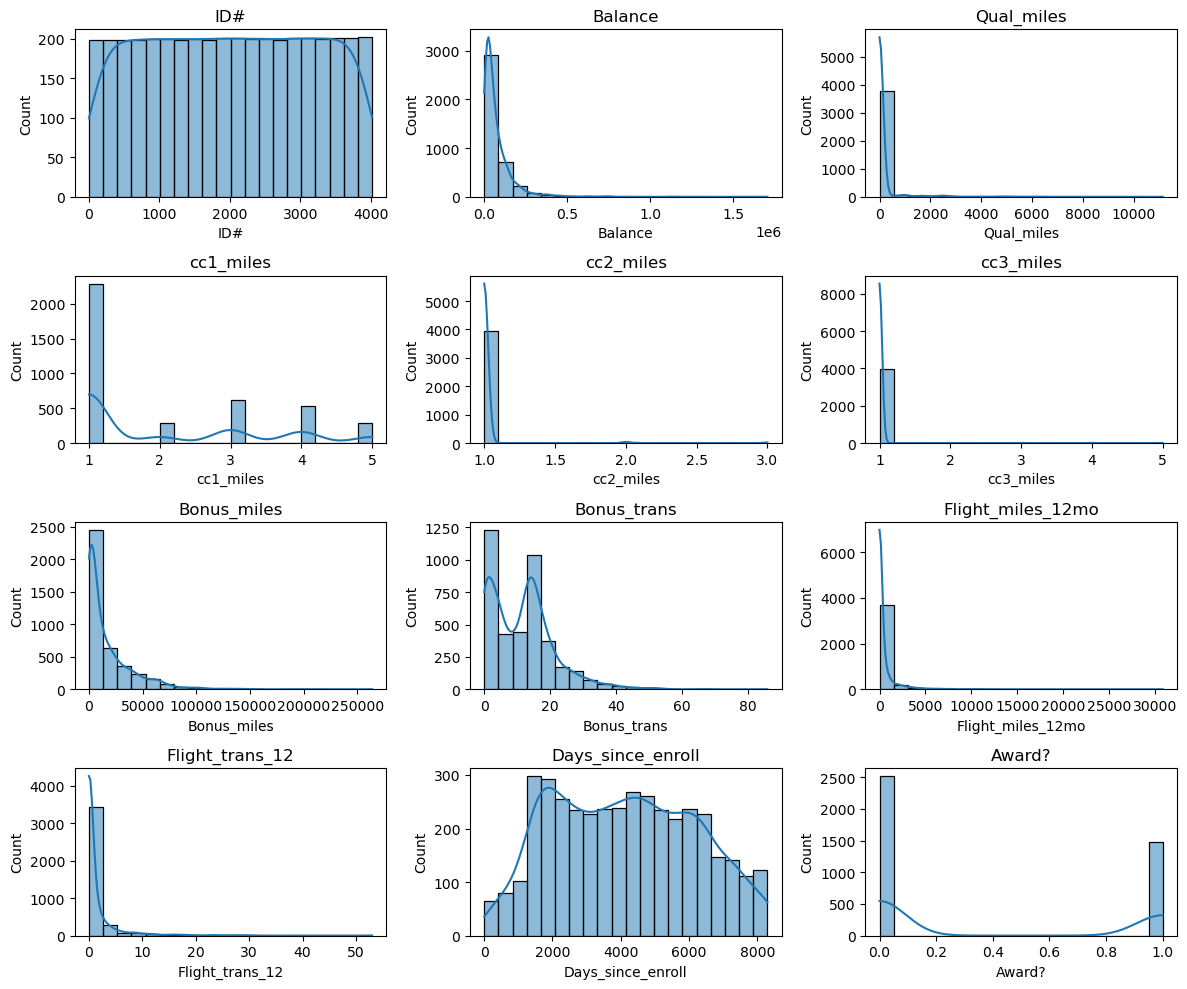

In [227]:
# Checking for the type of Distribution of Variables:

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

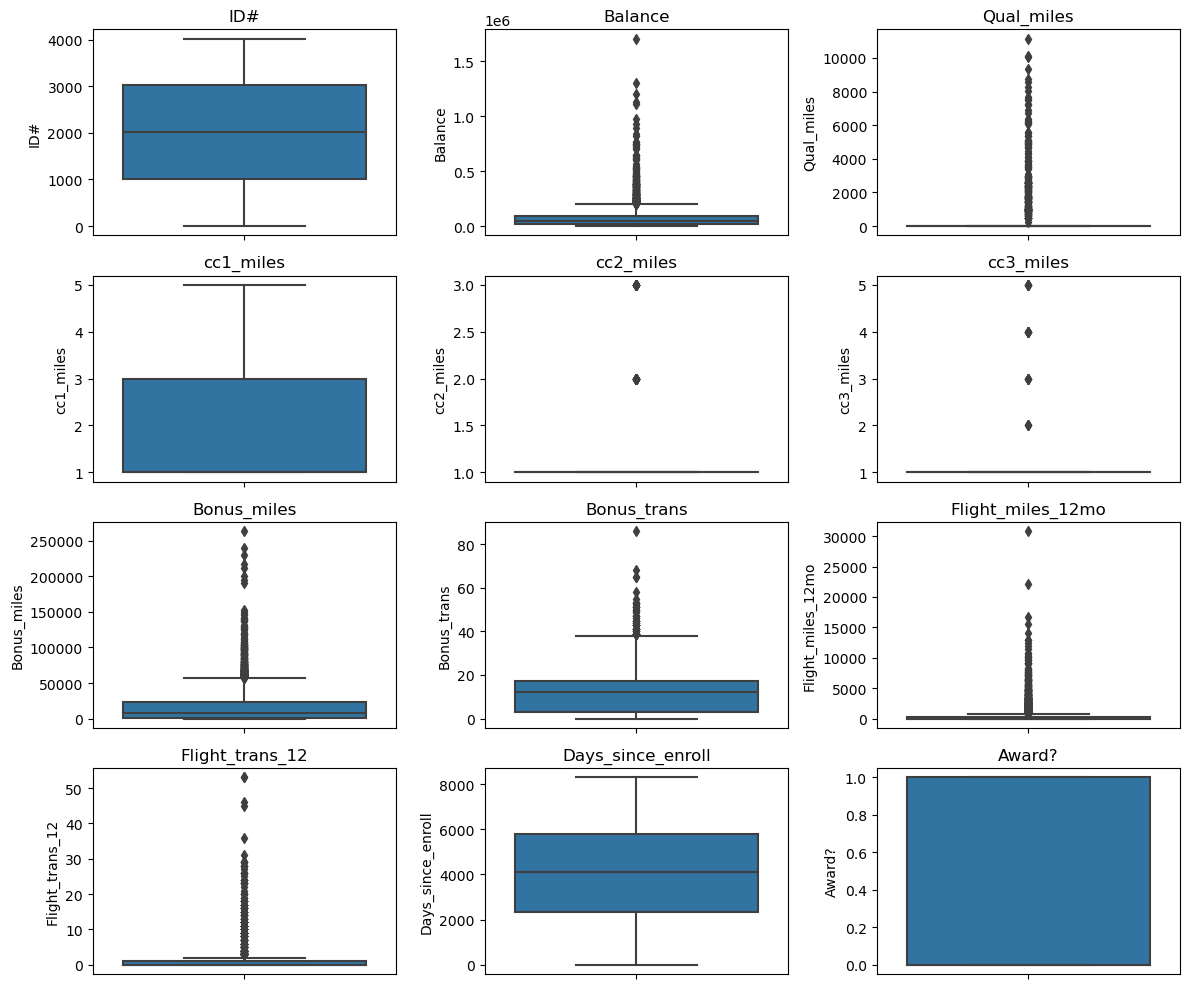

In [228]:
# Checking for Outliers:

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [229]:
# Handling Outliers using Z-score
from scipy import stats

z_score = stats.zscore(df)
absolute_zscores = abs(z_score)
filtered_data = (absolute_zscores < 3).all(axis=1)
df = df[filtered_data]
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


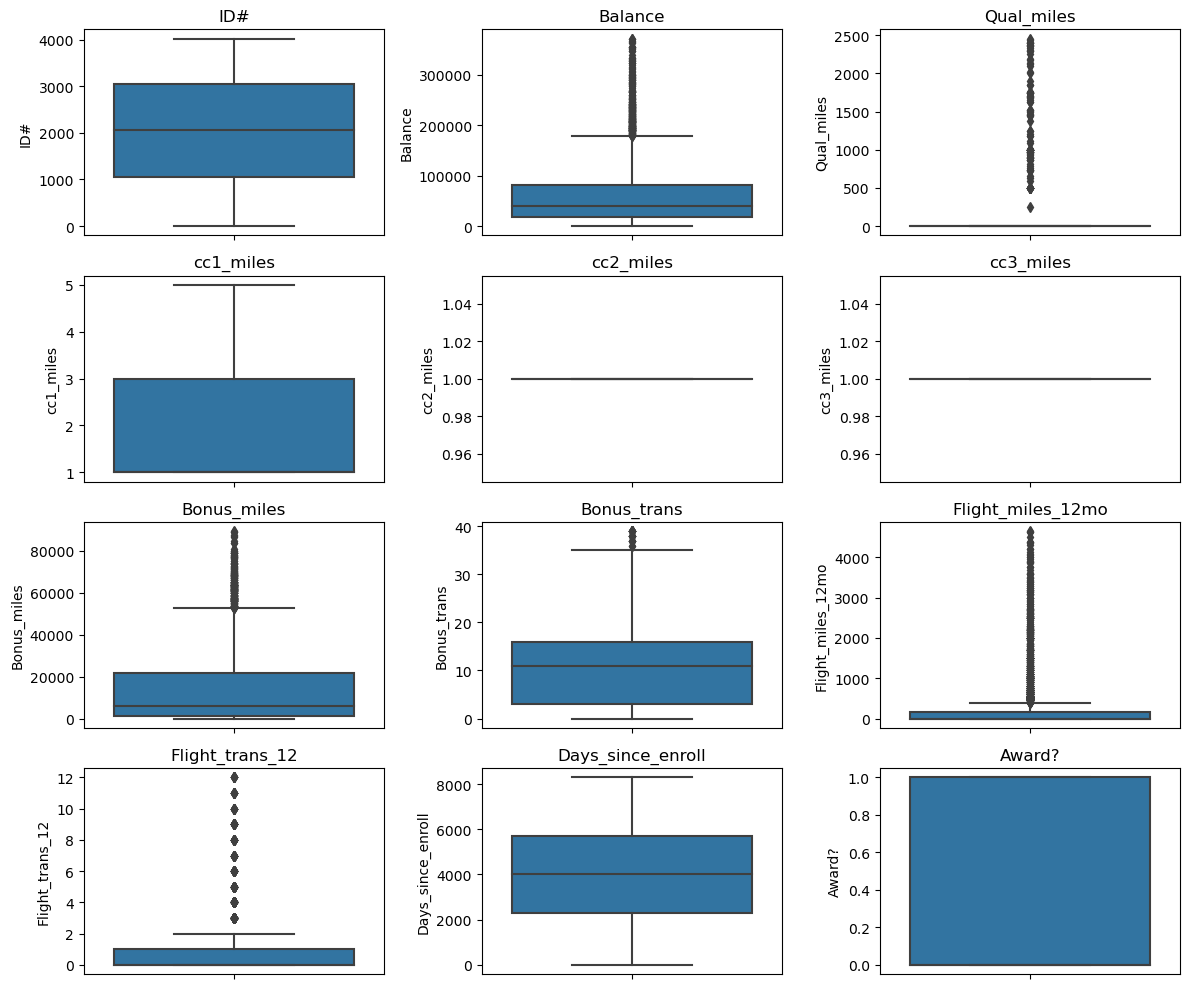

In [230]:
# Checking for Outliers:

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [231]:
# Scaling Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['ID#']))
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[1:])
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.523260,-0.158869,-0.755664,0.0,0.0,-0.779029,-1.147142,-0.401822,-0.431775,1.431438,-0.718093
1,-0.667084,-0.158869,-0.755664,0.0,0.0,-0.776768,-1.025933,-0.401822,-0.431775,1.415848,-0.718093
2,-0.309747,-0.158869,-0.755664,0.0,0.0,-0.561235,-0.783516,-0.401822,-0.431775,1.448002,-0.718093
3,-0.739295,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,-0.401822,-0.431775,1.408053,-0.718093
4,0.601746,-0.158869,1.517591,0.0,0.0,1.599448,1.883076,2.859455,1.768005,1.399771,1.392577
...,...,...,...,...,...,...,...,...,...,...,...
3625,-0.679496,-0.158869,-0.755664,0.0,0.0,-0.318457,-0.783516,-0.087785,0.118170,-1.295323,1.392577
3626,0.062475,-0.158869,-0.755664,0.0,0.0,-0.734522,-0.662307,-0.401822,-0.431775,-1.299221,1.392577
3627,0.211358,-0.158869,0.759839,0.0,0.0,0.614823,-0.298681,-0.401822,-0.431775,-1.295810,1.392577
3628,-0.090836,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,0.383271,0.118170,-1.296298,-0.718093


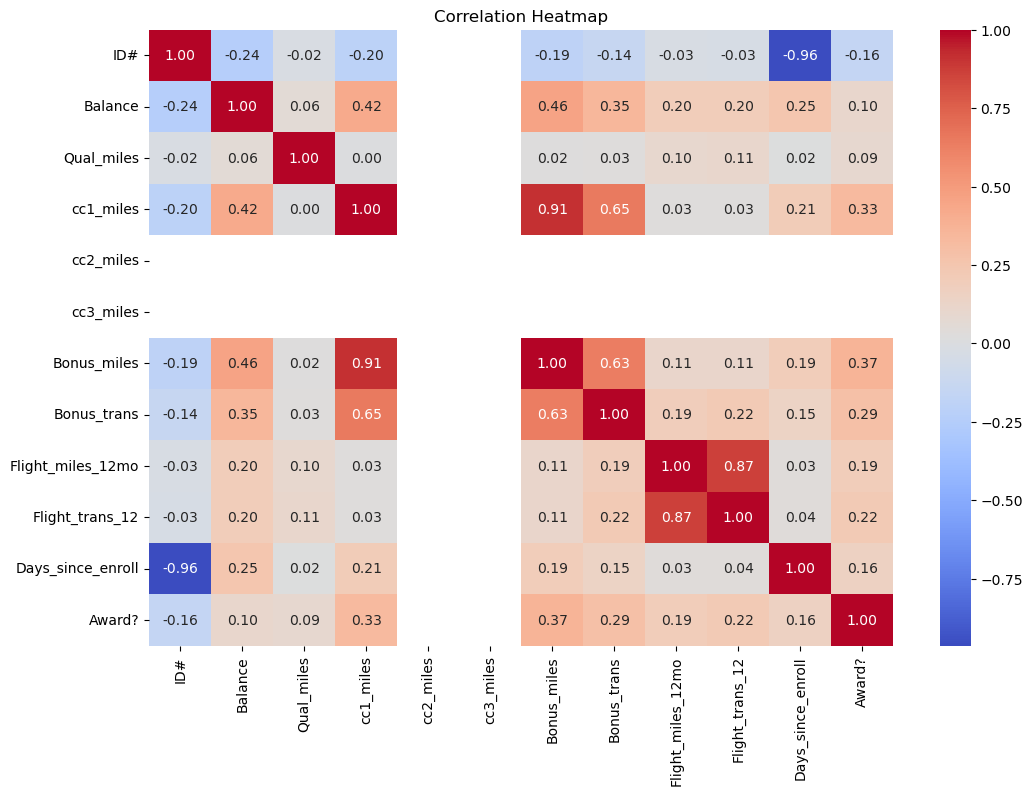

In [232]:
# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Implementing K-Means Clustering

In [233]:
from sklearn.cluster import KMeans

# Initializing Kmeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting KMeans to the scaled data
kmeans.fit(scaled_data)

# Getting cluster labels
kmeans_labels = kmeans.labels_

### Implementing Hierarchical Clustering

In [234]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering using Complete Linkage
linked = linkage(scaled_data, method='ward')

### Implementing DBSCAN Clustering

In [235]:
from sklearn.cluster import DBSCAN

# Initializing DBSCAN
dbscan = DBSCAN(eps=1, min_samples=15)

# Fit DBSCAN to the scaled Data
dbscan.fit(scaled_data)

# Getting cluster labels
dbscan_labels = dbscan.labels_

### Evaluating K-Means Clustering

In [236]:
# Evaluating K-Means Cluster
# Add K-Means cluster labels to the original dataset
df['KMeans_Cluster'] = kmeans_labels

# Analyze the characteristics of each cluster
cluster_analysis = df.groupby('KMeans_Cluster').mean()

# Interpretation
print("K-Means Cluster Analysis:")
display(cluster_analysis)

K-Means Cluster Analysis:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
KMeans_Cluster,,,,,,,,,,,,
0,2254.724977,37552.147383,30.538567,1.142792,1.0,1.0,3588.572544,6.044536,94.645546,0.336547,3661.658402,0.185491
1,1680.802500,94780.973333,30.530000,3.549167,1.0,1.0,32784.937500,17.353333,145.325833,0.463333,4737.310833,0.560000
2,1939.797619,95871.626984,160.884921,1.992063,1.0,1.0,18842.023810,15.857143,2176.250000,6.194444,4303.511905,0.630952


### Evaluating DBSCAN

In [237]:
# Add DBSCAN cluster labels to the original dataset
df['DBSCAN_Cluster'] = dbscan_labels

# Analyze the characteristics of each cluster
dbscan_cluster_analysis = df.groupby("DBSCAN_Cluster").mean()
display(dbscan_cluster_analysis)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,
-1,1753.604567,117234.451923,172.706731,2.669471,1.0,1.0,27037.187500,16.200721,915.435096,2.697115,4631.477163,0.564904,1.094952
0,2228.211510,43007.870635,0.000000,1.537629,1.0,1.0,7142.466306,7.632071,50.547467,0.186916,3706.833251,0.000000,0.177078
1,1866.183007,45374.287582,0.000000,2.487582,1.0,1.0,19464.643137,11.751634,84.364706,0.295425,4385.580392,1.000000,0.566013


### Visualize K-Means clustering results

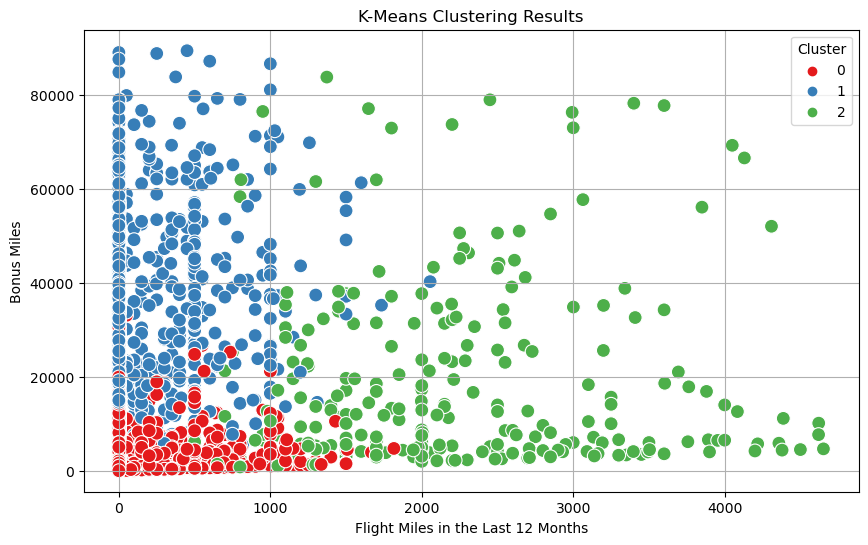

In [238]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight_miles_12mo', y='Bonus_miles', hue='KMeans_Cluster', data=df, palette='Set1', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Flight Miles in the Last 12 Months')
plt.ylabel('Bonus Miles')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Visualize Hierarchical Clustering using dendrogram

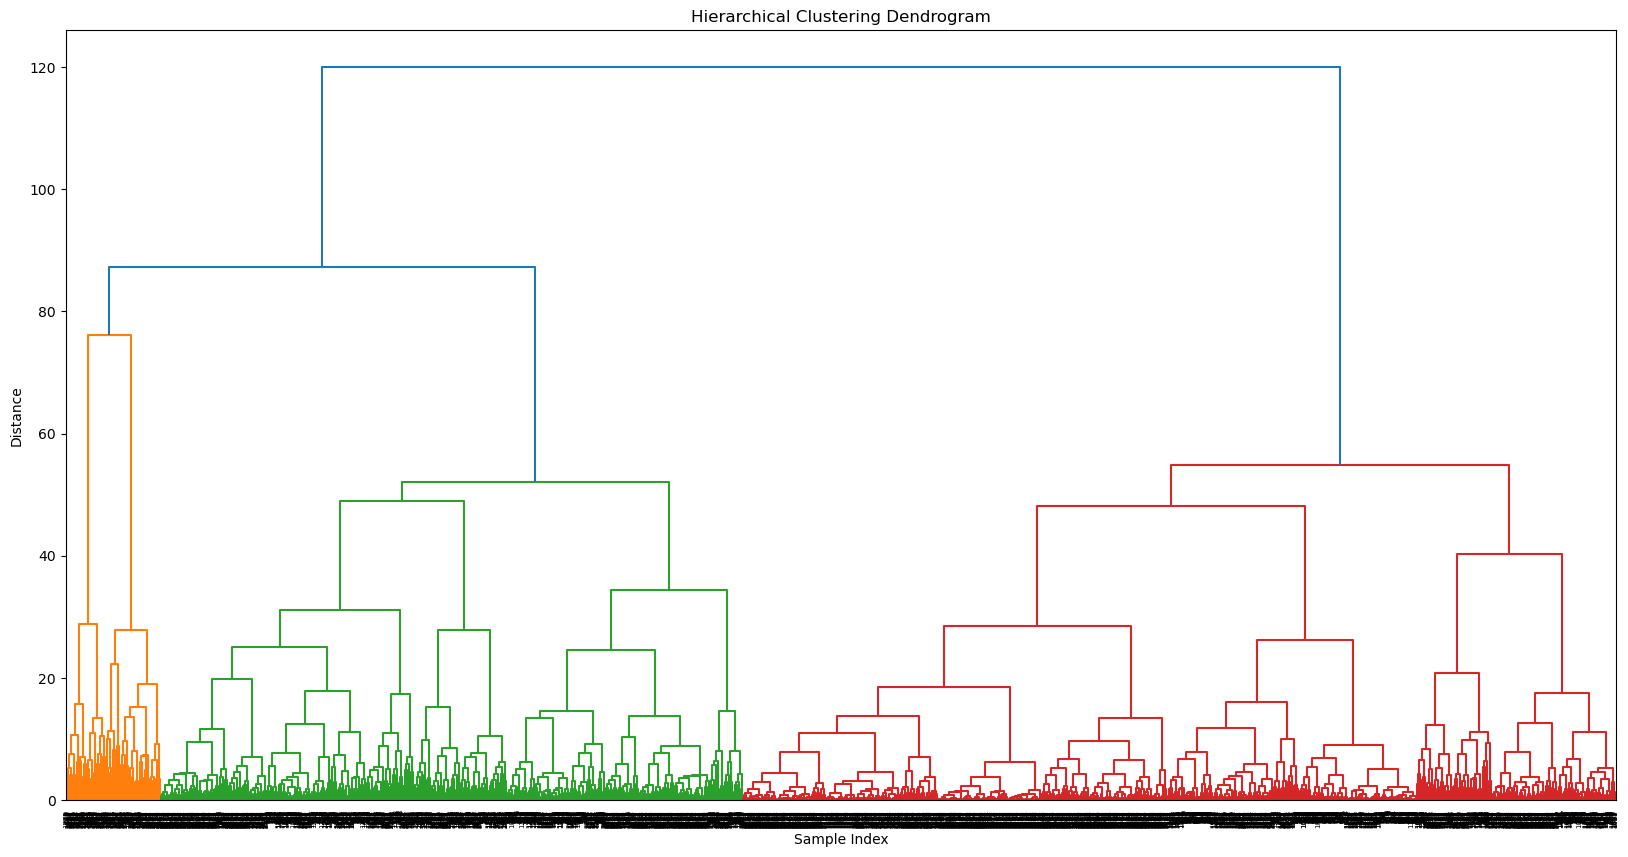

In [239]:
plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### Visualize DBSCAN clustering results

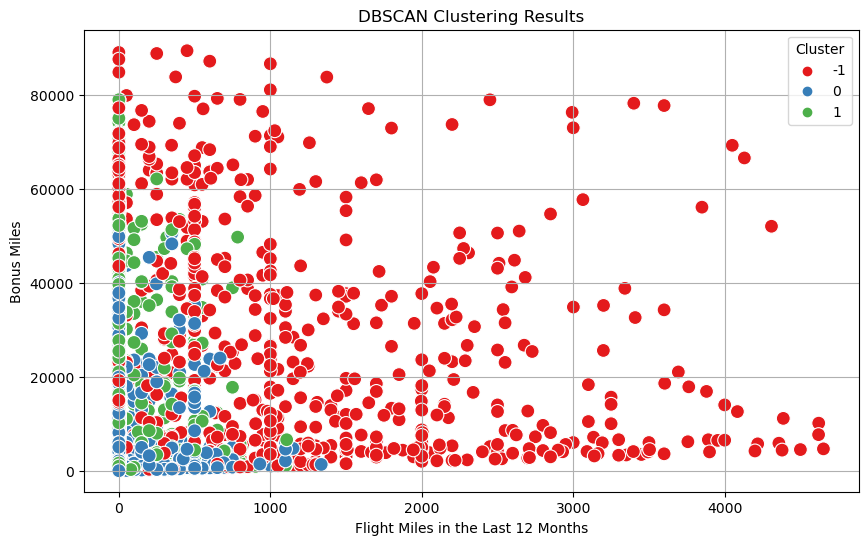

In [240]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight_miles_12mo', y='Bonus_miles', hue='DBSCAN_Cluster', data=df, palette='Set1', s=100)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Flight Miles in the Last 12 Months')
plt.ylabel('Bonus Miles')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Evaluating K-Means and DBSCAN using Silhouette Score

In [241]:
from sklearn.metrics import silhouette_score

# Assuming data is the preprocessed dataset and k is the number of clusters for K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# Calculate silhouette score
kmeans_silhouette_score = silhouette_score(df, kmeans.labels_)
print("Silhouette Score for K-Means:", kmeans_silhouette_score)


# Calculate silhouette score (Note: DBSCAN does not inherently have a silhouette score)
# For evaluation, we need to filter out noise points (-1 label) as they do not belong to any cluster
dbscan_silhouette_score = silhouette_score(df[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1])
print("Silhouette Score for DBSCAN:", dbscan_silhouette_score)

Silhouette Score for K-Means: 0.5625647835072084
Silhouette Score for DBSCAN: 0.06938963944408844
